# TWITTER SENTIMENTS
## OBSERVATIONS

- Fox News is has the lowest sentiment score out of all news networks indicating that tweets posted to their page carry negative sentiment more often than that of other news networks. 
- CBS on the other hand has the highest sentiment scores indicating that tweets posted to their page usually carry more positive sentiments.
- Most tweets tended to be neutral in nature with compound scores of zero so there are many instances in which posted tweets do not have any impact on the sentiment rating of the network.

In [36]:
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import tweepy
import json
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Credentials
consumer_key = "hOmtTSlsgccHdUT0tuec2pusM"
consumer_secret = "B7UUkNqKaAFjyKA1tSWCbxG4bVm1J7N2osBT4uSoEk4gN4GYVC"
access_token = "869703899963371520-2pt0OjB9KnDqyIe9BgMwQtBLj5ShosD"
access_token_secret = "LnIycvYf7HSbT20Eo4i8YmxXS6vPO6UfaD3pLyd6O0Die"

In [3]:
# Use Tweepy to Authenticate our access
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
news_networks = ["@CNN","@FoxNews","@BBC","@NYT","@CBS"]

In [17]:
news = []
account =[]
date = []
text =[]
tweet_number=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for network in news_networks:
    public_tweets = api.search(network, count=100, result_type="recent")
    for tweet in public_tweets['statuses']:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        news.append(network)
        account.append(tweet['user']['name'])
        date.append(tweet['created_at'])
        text.append(tweet['text'])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [18]:
#create the data frame
df = pd.DataFrame({
    "Network":news,
    "User":account,
    "Date":date,
    "Text":text,
    "Positive":positive_list,
    "Neutral":neutral_list,
    "Negative":negative_list,
    "Compound":compound_list,
})
df = df[['Network','User','Date','Text','Positive','Neutral','Negative','Compound']]

@FoxNews    100
@NYT        100
@CNN        100
@BBC         97
@CBS         84
Name: Network, dtype: int64

In [19]:
df.to_csv("Twitter_Sentiments.csv")
df = df.sort_values("Date")
df

,Network,User,Date,Text,Positive,Neutral,Negative,Compound
327,@NYT,Joey Baker,Fri Sep 22 00:06:38 +0000 2017,This should have been in the opinion section. ...,0.119,0.881,0.000,0.4019
326,@NYT,Joey Baker,Fri Sep 22 00:08:24 +0000 2017,@NYT The quotes from tech companies are pro-fo...,0.000,1.000,0.000,0.0000
325,@NYT,Doc holiday,Fri Sep 22 00:28:47 +0000 2017,@NewtTrump @MSNBC @GeorgiaDirtRoad @nyt @CNN ...,0.000,0.638,0.362,-0.5267
324,@NYT,ReefScan,Fri Sep 22 00:39:13 +0000 2017,RT @NYT: Building a Better Coral Reef. https:/...,0.326,0.674,0.000,0.4404
323,@NYT,kmg,Fri Sep 22 00:51:43 +0000 2017,RT @NYT: Kim’s Rejoinder to Trump’s Rocket Man...,0.000,1.000,0.000,0.0000
322,@NYT,YMCA Chicago,Fri Sep 22 01:00:05 +0000 2017,"Hey parents, what #apps are your kids and teen...",0.000,1.000,0.000,0.0000
321,@NYT,richard p. mchugh,Fri Sep 22 01:04:05 +0000 2017,RT @NYT: Kim’s Rejoinder to Trump’s Rocket Man...,0.000,1.000,0.000,0.0000
320,@NYT,Zaire,Fri Sep 22 01:11:44 +0000 2017,RT @NYT: Kim’s Rejoinder to Trump’s Rocket Man...,0.000,1.000,0.000,0.0000
319,@NYT,cjland,Fri Sep 22 01:14:39 +0000 2017,A Glowing Cotton Study That Might Have Deserve...,0.000,1.000,0.000,0.0000
318,@NYT,AVST-CX-E,Fri Sep 22 01:14:43 +0000 2017,A Glowing Cotton Study That Might Have Deserve...,0.000,1.000,0.000,0.0000


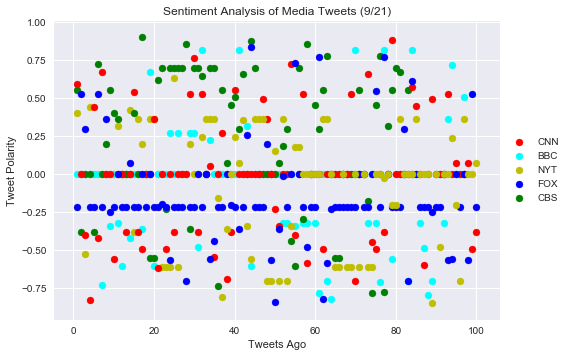

In [51]:
counter1=0
counter2=0
counter3=0
counter4=0
counter5=0

for index, row in df.iterrows():
    if (row["Network"]=="@CNN"):
        counter1 = counter1+1
        CNN = plt.scatter(counter1,row["Compound"],c ='r',marker="o")
    if (row["Network"]=="@NYT"):
        counter2 = counter2+1
        NYT = plt.scatter(counter2,row["Compound"],c ='y',marker="o")
    if (row["Network"]=="@FoxNews"):
        counter3 = counter3+1
        FOX = plt.scatter(counter3,row["Compound"],c ='b',marker="o")
    if (row["Network"]=="@BBC"):
        counter4 = counter4+1
        BBC = plt.scatter(counter4,row["Compound"],c ='cyan',marker="o")
    if (row["Network"]=="@CBS"):
        counter5 = counter5+1
        CBS = plt.scatter(counter5,row["Compound"],c ='g',marker="o")
        
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (9/21)")
plt.legend(handles = [CNN,BBC,NYT,FOX,CBS], labels = ["CNN","BBC","NYT","FOX","CBS"], loc='center left', bbox_to_anchor=(1, 0.5))

sns.set
plt.show()

In [53]:
new_df = pd.DataFrame(df.groupby("Network")["Compound"].mean())
new_df

,Compound
Network,
@BBC,-0.061058
@CBS,0.215937
@CNN,-0.008047
@FoxNews,-0.129581
@NYT,-0.057987


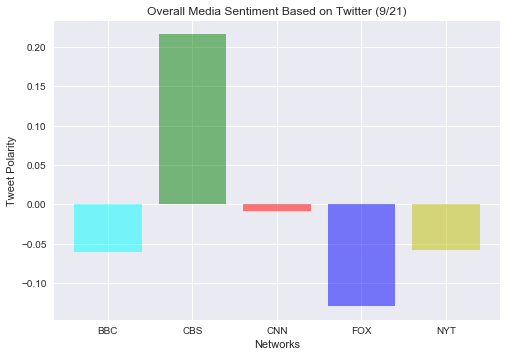

In [52]:
x_axis = np.arange(len(new_df["Compound"]))
compound_score = new_df["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (9/21)")
sns.set()
plt.show()